# Import

In [1]:
import os
import numpy as np
import pandas as pd
from os.path import join as pjoin
from matplotlib import pyplot as plt
from nibrain.util.plotfig import auto_bar_width
from cxy_visual_dev.lib.predefine import proj_dir

work_dir = pjoin(proj_dir, 'analysis/plot/plot_kendall')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# Define

In [19]:
def plot_bar(data_file, columns=None, title=None, sort=False,
             ylim=None, figsize=None, out_file=None):
    # load
    df = pd.read_csv(data_file, index_col=0)
    if columns is None:
        columns = df.columns.to_list()
    else:
        df = df[columns]

    # sort
    if sort:
        df = df.sort_values('tau', axis='columns', ascending=False)
        columns = df.columns.to_list()

    # prepare data
    taus = df.loc['tau'].to_list()
    ps = df.loc['p'].to_list()
    p_marks = []
    for p in ps:
        if p < 0:
            raise ValueError('Impossible!')
        elif p < 0.001:
            p_marks.append('***')
        elif p < 0.01:
            p_marks.append('**')
        elif p < 0.05:
            p_marks.append('*')
        else:
            p_marks.append('')

    # plot
    x = np.arange(len(taus))
    width = auto_bar_width(x)
    _, ax = plt.subplots(figsize=figsize)
    rects = ax.bar(x, taus, width, edgecolor='k', facecolor='w')
    assert len(rects) == len(p_marks)
    for rect, p_mark in zip(rects, p_marks):
        high = rect.get_height()
        if high < 0:
            plt.text(rect.get_x() + rect.get_width() / 2., high,
                     p_mark, ha='center', va='top')
        else:
            plt.text(rect.get_x() + rect.get_width() / 2., high,
                     p_mark, ha='center', va='bottom')
    if title is None:
        title = os.path.basename(data_file)
    ax.set_ylim(ylim)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title)
    ax.set_ylabel('Tau')
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

# Plot_bar

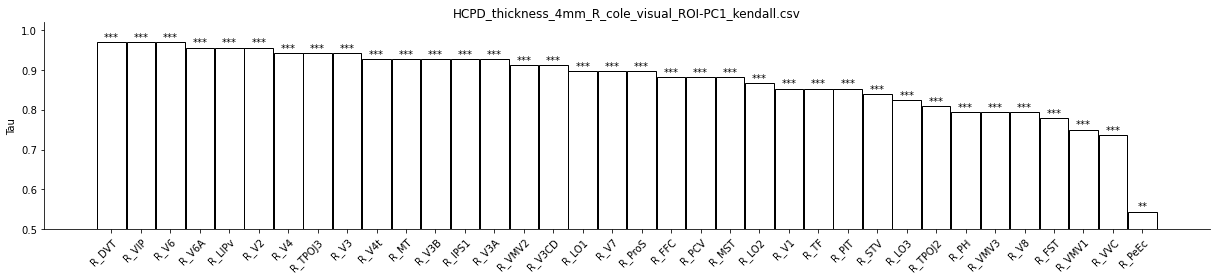

In [20]:
plot_bar(
    data_file=pjoin(proj_dir, 'analysis/dev_trend/HCPD_thickness_4mm_R_cole_visual_ROI-PC1_kendall.csv'),
    sort=True, figsize=(17, 4), ylim=0.5,
    out_file=pjoin(work_dir, 'HCPD_thickness_4mm_R_cole_visual_ROI-PC1_kendall_all.jpg')
)

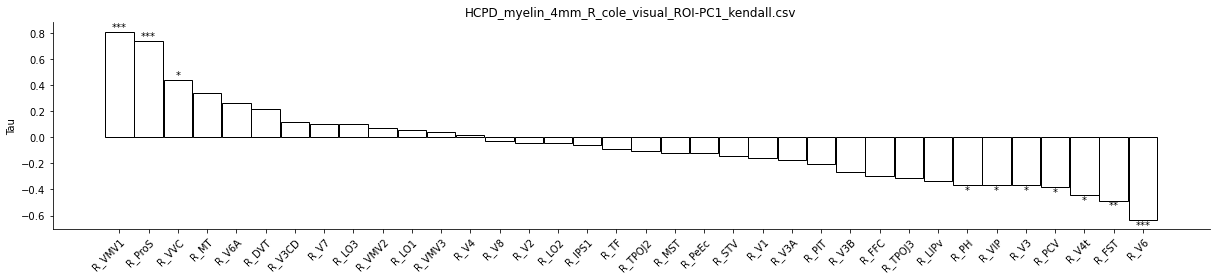

In [21]:
plot_bar(
    data_file=pjoin(proj_dir, 'analysis/dev_trend/HCPD_myelin_4mm_R_cole_visual_ROI-PC1_kendall.csv'),
    sort=True, figsize=(17, 4),
    out_file=pjoin(work_dir, 'HCPD_myelin_4mm_R_cole_visual_ROI-PC1_kendall_all.jpg')
)

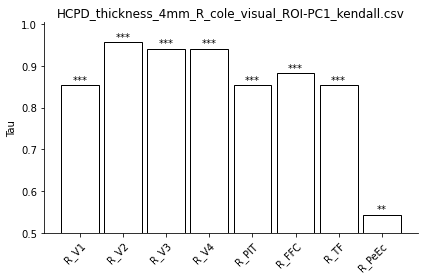

In [23]:
plot_bar(
    data_file=pjoin(proj_dir, 'analysis/dev_trend/HCPD_thickness_4mm_R_cole_visual_ROI-PC1_kendall.csv'),
    columns=['R_V1', 'R_V2', 'R_V3', 'R_V4', 'R_PIT', 'R_FFC', 'R_TF', 'R_PeEc'], figsize=(6, 4), ylim=0.5,
    out_file=pjoin(work_dir, 'HCPD_thickness_4mm_R_cole_visual_ROI-PC1_kendall_path1.jpg')
)

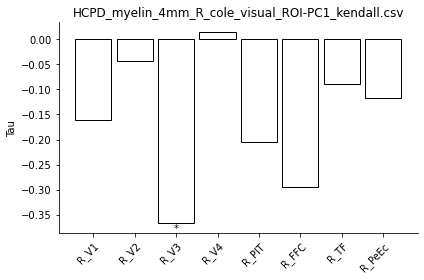

In [24]:
plot_bar(
    data_file=pjoin(proj_dir, 'analysis/dev_trend/HCPD_myelin_4mm_R_cole_visual_ROI-PC1_kendall.csv'),
    columns=['R_V1', 'R_V2', 'R_V3', 'R_V4', 'R_PIT', 'R_FFC', 'R_TF', 'R_PeEc'], figsize=(6, 4),
    out_file=pjoin(work_dir, 'HCPD_myelin_4mm_R_cole_visual_ROI-PC1_kendall_path1.jpg')
)